# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code:
sat_2017 = 'data/sat_2017.csv'
act_2017 = 'data/act_2017_updated.csv'

import pandas as pd
sat17 = pd.read_csv(sat_2017)
act17 = pd.read_csv(act_2017)

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#Code:
sat17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: The two data sets have different number of column with different header. In Act 2017 data, a national data is also present while the Sat 2017 only has data for each state. Both data has State and Participation as string data and the rest of the data as float data. Furthermore, both ACT and SAT scores are displayed with different subject title, each with different scale of score which I have to take note of when comparing. 

#### 4a. Does the data look complete? 

Answer: Both data seems to be completed (without Nan) with data from 51 states

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:
SAT: 400 - 1600 (200 - 800 each)
ACT: 1  - 36

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
#code
def find_error(test):
    if len(test.columns) == 7:
        for i in range(len(test['English'])): 
            if  (test['English'][i] > 36) |  (test['English'][i] < 1):
                test['English'][i] = np.nan
            if  (test['Math'][i] > 36) |  (test['Math'][i] < 1):
                test['Math'][i] = np.nan
            if  (test['Reading'][i]  > 36) |   (test['Reading'][i]  < 1):
                test['Reading'][i]  = np.nan
            if  (test['Science'][i]  > 36) |   (test['Science'][i]  < 1):
                test['Science'][i]  = np.nan
       
    else:
        for j in range(len(test['Evidence-Based Reading and Writing'])):
            if (test['Evidence-Based Reading and Writing'][j] < 200) | (test['Evidence-Based Reading and Writing'][j] > 800):
                test['Evidence-Based Reading and Writing'][j] = np.nan     
            if (test['Math'][j] < 200) | (test['Math'][j] > 800):
                test['Math'][j]  = np.nan     

    return 

In [6]:
find_error(sat17)
find_error(act17)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
#Finding the null value
sat17.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  1
Total                                 0
dtype: int64

In [8]:
sat17 = sat17.fillna(524) #Fixing the null value with the corrected score 524
sat17.isnull().sum()

State                                 0
Participation                         0
Evidence-Based Reading and Writing    0
Math                                  0
Total                                 0
dtype: int64

#### 5. What are your data types? 
Display the data types of each feature. 

In [9]:
#code
sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null float64
Total                                 51 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ KB


In [10]:
act17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: The participation columns in both data sets are non-null object even though we need them as float/integer to make comparison

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [11]:
#code
partofloat = lambda x: float(x[0:-1]) #changing all characters except % to float for participation

- Fix any individual values preventing other columns from being the appropriate type.

In [12]:
#code
sat17['Participation'] = sat17['Participation'].apply(partofloat)
act17['Participation'] = act17['Participation'].apply(partofloat)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [13]:
#code
#function to convert number to float, string to nan 
def to_num(x):
    try:
        out = float(x)
    except:
        out = np.nan
    return out

sat17['Evidence-Based Reading and Writing'] = sat17['Evidence-Based Reading and Writing'].apply(to_num)
sat17['Total'] = sat17['Total'].apply(to_num)
sat17['State'] = sat17['State'].apply(lambda x: str(x))
act17['State'] = act17['State'].apply(lambda x: str(x))

- Display the data types again to confirm they are correct.

In [14]:
#Code:
sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null float64
Evidence-Based Reading and Writing    51 non-null float64
Math                                  51 non-null float64
Total                                 51 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [15]:
act17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null float64
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null float64
dtypes: float64(6), object(1)
memory usage: 2.9+ KB


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [16]:
#code
#Replace SAT 2017 data set column name with rename funtion
sat17.rename(columns={'State':'state', 
                      'Participation': '17_sat_part', 
                      'Evidence-Based Reading and Writing': '17_sat_ebrw',
                      'Math':'17_sat_math', 
                      'Total':'17_sat_total' }, inplace=True)
#Replace ACT 2017 data set column name with rename funtion
act17.rename(columns ={'State':'state', 
                       'Participation': '17_act_part', 
                       'English':'17_act_english', 
                       'Math':'17_act_math',
                       'Science':'17_act_science', 
                       'Reading':'17_act_reading',
                       'Composite':'17_act_composite'}, inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|*object*|SAT|The state of USA with students participated in SAT| 
|**sat_part**|*float*|SAT|The participation rate of students of each state for SAT|
|**sat_ebrw**|*float*|SAT|The average score of Evidence-Based Reading and Writing for each state|
|**sat_math**|*float*|SAT|The average score of Math for each state|
|**sat_total**|*float*|SAT|The average total score of SAT for each state|
|**state**|*object*|ACT|The state of USA with students participated in ACT|
|**act_part**|*float*|ACT|The participation rate of students of each state for ACT|
|**act_english**|*float*|ACT|The average score of English for each state|
|**act_math**|*float*|ACT|The average score of Math for each state|
|**act_reading**|*float*|ACT|The average score of Reading for each state|
|**act_science**|*float*|ACT|The average score of Science for each state|
|**act_composite**|*float*|ACT|The average composite score of ACT for each state|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [17]:
#code
act17.drop(act17.index[0], inplace=True)

In [18]:
act17.head()

,state,17_act_part,17_act_english,17_act_math,17_act_reading,17_act_science,17_act_composite
1,Alabama,100.0,18.9,18.4,19.7,19.4,19.2
2,Alaska,65.0,18.7,19.8,20.4,19.9,19.8
3,Arizona,62.0,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4
5,California,31.0,22.5,22.7,23.1,22.2,22.8


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [19]:
#Code:
combined_2017 = pd.merge(sat17,act17,on='state') #merging 2 data sets on state

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [20]:
#code
combined_2017.to_csv('data/combined_2017.csv',index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [21]:
sat_2018 = 'data/sat_2018.csv'
act_2018 = 'data/act_2018_updated.csv'

import pandas as pd
sat18 = pd.read_csv(sat_2018) #reading SAT 2018 file as SAT18
act18 = pd.read_csv(act_2018) #reading ACT 2018 file as ACT18

#Defining function to find error (if any) that has values beyond possible score of SAT & ACT 2018
def find_error18(test):
    if len(test.columns) == 7: #check if passed in df is ACT or SAT, ACT has 7 columns while sat has 5
        for i in range(len(test['Average English Score'])): 
            if  (test['Average English Score'][i] > 36) |  (test['Average English Score'][i] < 1):
                test['Average English Score'][i] = np.nan
            if  (test['Average Math Score'][i] > 36) |  (test['Average Math Score'][i] < 1):
                test['Average Math Score'][i] = np.nan
            if  (test['Average Reading Score'][i]  > 36) |   (test['Average Reading Score'][i]  < 1):
                test['Average Reading Score'][i]  = np.nan
            if  (test['Average Science Score'][i]  > 36) |   (test['Average Science Score'][i]  < 1):
                test['Average Science Score'][i]  = np.nan
    else:    
        for j in range(len(test['Evidence-Based Reading and Writing'])):
            if (test['Evidence-Based Reading and Writing'][j] < 200) | (test['Evidence-Based Reading and Writing'][j] > 800):
                test['Evidence-Based Reading and Writing'][j] = np.nan     
            if (test['Math'][j] < 200) | (test['Math'][j] > 800):
                test['Math'][j]  = np.nan     
        
    return 

#Running the function
find_error18(sat18)
find_error18(act18)

#To remove % in SAT 2018 data and convert values from string to float
sat18['Participation'] = sat18['Participation'].apply(partofloat)

#To convert SAT 2018 Envidence-Based Reading and Writing, Math & Total data to float type
sat18['Evidence-Based Reading and Writing'] = sat18['Evidence-Based Reading and Writing'].apply(to_num)
sat18['Math'] = sat18['Math'].apply(to_num)
sat18['Total'] = sat18['Total'].apply(to_num)

#To convert ACT 2018 Percentage of Students Tested to float type
act18['Percentage of Students Tested'] = act18['Percentage of Students Tested'].apply(to_num)

#Replace SAT 2018 data set column name with rename funtion
sat18.rename(columns={'State':'state', 'Participation': '18_sat_part', 'Evidence-Based Reading and Writing': '18_sat_ebrw', 'Math':'18_sat_math', 'Total':'18_sat_total' }, inplace=True)

#Replace ACT 2018 data set column name with rename funtion
act18.rename(columns ={'State':'state', 'Percentage of Students Tested': '18_act_part', 'Average English Score':'18_act_english', 'Average Math Score':'18_act_math', 'Average Science Score':'18_act_science', 'Average Reading Score':'18_act_reading','Average Composite Score':'18_act_composite'}, inplace=True)

#combining 2018 file
combined_2018 = pd.merge(sat18,act18,on='state') #merging 2 data sets on state

#displaying combined file
combined_2018.head()

,state,18_sat_part,18_sat_ebrw,18_sat_math,18_sat_total,18_act_part,18_act_composite,18_act_english,18_act_math,18_act_reading,18_act_science
0,Alabama,6.0,595.0,571.0,1166.0,100.0,19.1,18.9,18.3,19.6,19.0
1,Alaska,43.0,562.0,544.0,1106.0,33.0,20.8,19.8,20.6,21.6,20.7
2,Arizona,29.0,577.0,572.0,1149.0,66.0,19.2,18.2,19.4,19.5,19.2
3,Arkansas,5.0,592.0,576.0,1169.0,100.0,19.4,19.1,18.9,19.7,19.4
4,California,60.0,540.0,536.0,1076.0,27.0,22.7,22.5,22.5,23.0,22.1


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [22]:
#combining 2017 & 2018 data
final = pd.merge(combined_2017,combined_2018,on='state')
#writing to .csv
final.to_csv('data/final.csv',index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [23]:
#Code:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
17_sat_part,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
17_sat_ebrw,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
17_sat_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
17_sat_total,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
17_act_part,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
17_act_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
17_act_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
17_act_reading,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
17_act_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
17_act_composite,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [24]:
#Function to calculate standard deviation
def sd(data):
    mean = 0
    stand_dev = []
    #To assign nan value to 1st item in the list as it correspond to 'state'
    stand_dev.append(np.nan)
    #looping through each column in data
    for i in data: 
        #pass to next loop for the first column
        if i == 'state':
            pass
        else:
            #Calculate the mean for each column & assign to a temporary mean variable
            mean = data[i].mean()
            #Reset the temp variable for each i loop to reset calculation for STD
            temp = 0
            #looping through each row in each column to calculate variance
            for j in data[i]:
                #To pass if encounter a nan value in the data (Only 1 in this project)
                if np.isnan(j):
                    pass
                else:
                    #Sum up the temporary (x-mean)**2 value for the whole column
                    temp = temp + (j - mean)**2
            #Add the caculated STD to the stand_dev list        
            stand_dev.append(np.sqrt(temp/len(data)))  
            
    #Return the completed standard deviation list        
    return stand_dev

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [25]:
#Code:
sd_dict = dict(zip(final.keys(),sd(final)))
sd_dict

{'state': nan,
 '17_sat_part': 34.92907076664508,
 '17_sat_ebrw': 45.21697020437866,
 '17_sat_math': 46.65713364485503,
 '17_sat_total': 91.58351056778743,
 '17_act_part': 31.824175751231806,
 '17_act_english': 2.3304876369363363,
 '17_act_math': 1.9624620273436781,
 '17_act_reading': 2.0469029314842646,
 '17_act_science': 1.7222161451443676,
 '17_act_composite': 2.000786081581989,
 '18_sat_part': 36.946619223539415,
 '18_sat_ebrw': 47.03460978357609,
 '18_sat_math': 47.30194550378352,
 '18_sat_total': 93.22742384464433,
 '18_act_part': 33.745194881997506,
 '18_act_composite': 2.0855261815801147,
 '18_act_english': 2.4222536143202795,
 '18_act_math': 2.015707255555717,
 '18_act_reading': 2.145891884510421,
 '18_act_science': 1.8516885484833543}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

There is slight difference between the manually calculated standard deviations with pandas describe. 

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [26]:
#Creating masking to find highest  & lowest participation rate for SAT & ACT in both years
highest_sat2017 = (final['17_sat_part']== final['17_sat_part'].max()) #Highest SAT 2017
lowest_sat2017 = (final['17_sat_part'] == final['17_sat_part'].min()) #Lowest SAT 2017
highest_sat2018 = final['18_sat_part'] == final['18_sat_part'].max()  #Highest SAT 2018
lowest_sat2018 = final['18_sat_part'] == final['18_sat_part'].min()   #Lowest SAT 2018

highest_act2017 = (final['17_act_part'] == final['17_act_part'].max())
lowest_act2017 = (final['17_act_part'] == final['17_act_part'].min())
highest_act2018 = (final['18_act_part'] == final['18_act_part'].max())
lowest_act2018 = (final['18_act_part'] == final['18_act_part'].min())

In [27]:
#Highest participated state for SAT 2017
final[highest_sat2017][['state','17_sat_part']]

,state,17_sat_part
6,Connecticut,100.0
7,Delaware,100.0
8,District of Columbia,100.0
22,Michigan,100.0


In [28]:
#Lowest participated state for SAT 2017
final[lowest_sat2017][['state','17_sat_part']]

,state,17_sat_part
15,Iowa,2.0
24,Mississippi,2.0
34,North Dakota,2.0


In [29]:
#Highest participated state for SAT 2018
final[highest_sat2018][['state','18_sat_part']]

,state,18_sat_part
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
12,Idaho,100.0
22,Michigan,100.0


In [30]:
#Lowest participated state for SAT 2018
final[lowest_sat2018][['state','18_sat_part']]

,state,18_sat_part
34,North Dakota,2.0


In [31]:
#Highest participated state for ACT 2017
final[highest_act2017][['state','17_act_part']]

,state,17_act_part
0,Alabama,100.0
3,Arkansas,100.0
5,Colorado,100.0
17,Kentucky,100.0
18,Louisiana,100.0
23,Minnesota,100.0
24,Mississippi,100.0
25,Missouri,100.0
26,Montana,100.0
28,Nevada,100.0


In [32]:
#Lowest participated state for ACT 2017
final[lowest_act2017][['state','17_act_part']]

,state,17_act_part
19,Maine,8.0


In [33]:
#Highest participated state for ACT 2018
final[highest_act2018][['state','18_act_part']]

,state,18_act_part
0,Alabama,100.0
3,Arkansas,100.0
17,Kentucky,100.0
18,Louisiana,100.0
24,Mississippi,100.0
25,Missouri,100.0
26,Montana,100.0
27,Nebraska,100.0
28,Nevada,100.0
33,North Carolina,100.0


In [34]:
#Lowest participated state for ACT 2018
final[lowest_act2018][['state','18_act_part']]

,state,18_act_part
19,Maine,7.0


# The Highest & Lowest Participated State for SAT & ACT in both Years

## SAT2017

**Highest Participated State**: 

Connecticut, Delaware, District of Columbia & Michigan

**Lowest Participated State**: 

Iowa, Mississippi & North Dakota

## SAT2018

**Highest Participated State**:

Colorado, Connecticut, Delaware, Idaho & Michigan

**Lowest Participated State**: 

North Dakota

## ACT2017

**Highest Participated State**: 

Alabama, Arkansas, Colorado , Kentucky, Louisiana, Minnesota, Mississippi, Missouri, Montana, Nevada, North Carolina, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming

**Lowest Participated State**: 

Maine

## ACT2018

**Highest Participated State**: 

Alabama, Arkansas , Kentucky, Louisiana, Mississippi, Missouri, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin, Wyoming

**Lowest Participated State**: 

Maine

In [35]:
#SAT 2017 highest mean total score
final.sort_values('17_sat_total',ascending=False).head()[['state','17_sat_total']]

,state,17_sat_total
23,Minnesota,1295.0
49,Wisconsin,1291.0
15,Iowa,1275.0
25,Missouri,1271.0
16,Kansas,1260.0


In [36]:
#SAT 2017 lowest mean total score
final.sort_values('17_sat_total',ascending=True).head()[['state','17_sat_total']]

,state,17_sat_total
8,District of Columbia,950.0
7,Delaware,996.0
12,Idaho,1005.0
22,Michigan,1005.0
19,Maine,1012.0


In [37]:
#SAT 2018 highest mean total score
final.sort_values('18_sat_total',ascending=False).head()[['state','18_sat_total']]

,state,18_sat_total
23,Minnesota,1298.0
49,Wisconsin,1294.0
34,North Dakota,1283.0
15,Iowa,1265.0
16,Kansas,1265.0


In [38]:
#SAT 2018 lowest mean total score
final.sort_values('18_sat_total',ascending=True).head()[['state','18_sat_total']]

,state,18_sat_total
8,District of Columbia,977.0
7,Delaware,998.0
48,West Virginia,999.0
12,Idaho,1001.0
44,Utah,1010.0


In [39]:
#ACT 2017 highest mean total score
final.sort_values('17_act_composite',ascending=False).head()[['state','17_act_composite']]

,state,17_act_composite
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


In [40]:
#ACT 2017 lowest mean total score
final.sort_values('17_act_composite',ascending=True).head()[['state','17_act_composite']]

,state,17_act_composite
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


In [41]:
#ACT 2018 highest mean total score
final.sort_values('18_act_composite',ascending=False).head()[['state','18_act_composite']]

,state,18_act_composite
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


In [42]:
#ACT 2018 lowest mean total score
final.sort_values('18_act_composite',ascending=True).head()[['state','18_act_composite']]

,state,18_act_composite
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


# The Highest & Lowest Mean Total/Composite Score State for SAT & ACT in both Years

## SAT2017

**Highest Total Score State**: 

Minnesota

**Lowest Total Score State**: 

District of Columbia

## SAT2018

**Highest Total Score State**: 

Minnesota

**Lowest Total Score State**: 

District of Columbia

## ACT2017

**Highest Composite Score State**: 

New Hampshire		

**Lowest Composite Score State**: 

Nevada	


## ACT2018

**Highest Composite Score State**: 

Connecticut	

**Lowest Composite Score State**:  

Nevada	

## Do any states with 100% participation on a given test have a rate change year-to-year?

In [56]:
#SAT
final[(final['17_sat_part'] == 100) | (final['18_sat_part'] == 100)][['state','17_sat_part','18_sat_part']]

,state,17_sat_part,18_sat_part
5,Colorado,11.0,100.0
6,Connecticut,100.0,100.0
7,Delaware,100.0,100.0
8,District of Columbia,100.0,92.0
12,Idaho,93.0,100.0
22,Michigan,100.0,100.0


Colorado has an increase of 809% in SAT participation rate

District of Columnbia has a decrease of 8.69% in SAT participation rate

Idaho has an increase of 7.52% in SAT participation rate

In [57]:
#ACT
final[(final['17_act_part'] == 100) | (final['18_act_part'] == 100)][['state','17_act_part','18_act_part']]

,state,17_act_part,18_act_part
0,Alabama,100.0,100.0
3,Arkansas,100.0,100.0
5,Colorado,100.0,30.0
17,Kentucky,100.0,100.0
18,Louisiana,100.0,100.0
23,Minnesota,100.0,99.0
24,Mississippi,100.0,100.0
25,Missouri,100.0,100.0
26,Montana,100.0,100.0
27,Nebraska,84.0,100.0


Colorado has a decrease of 70% in ACT participation rate

Minnesota has a decrease of 1 % in ACT participation rate

Nebraska has an increase of 19% in ACT participation rate

Ohio has an increase of 33.3% in ACT participation rate

## Do any states show have >50% participation on both tests either year?

In [68]:
#2017
print('Number of states >50% participation on both test in 2017: ' + str(len(final[(final['17_sat_part'] > 50) & (final['17_act_part'] > 50)][['state','17_sat_part','17_act_part']])))
final[(final['17_sat_part'] > 50) & (final['17_act_part'] > 50)][['state','17_sat_part','17_act_part']]

Number of states >50% participation on both test in 2017: 3


,state,17_sat_part,17_act_part
9,Florida,83.0,73.0
10,Georgia,61.0,55.0
11,Hawaii,55.0,90.0


In [69]:
#2018
print('Number of states > 50% participation on both test in 2018: ' + str(len(final[(final['18_sat_part'] > 50) & (final['18_act_part'] > 50)][['state','18_sat_part','18_act_part']])))
final[(final['18_sat_part'] > 50) & (final['18_act_part'] > 50)][['state','18_sat_part','18_act_part']]

Number of states > 50% participation on both test in 2018: 5


,state,18_sat_part,18_act_part
9,Florida,56.0,66.0
10,Georgia,70.0,53.0
11,Hawaii,56.0,89.0
33,North Carolina,52.0,100.0
40,South Carolina,55.0,100.0


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

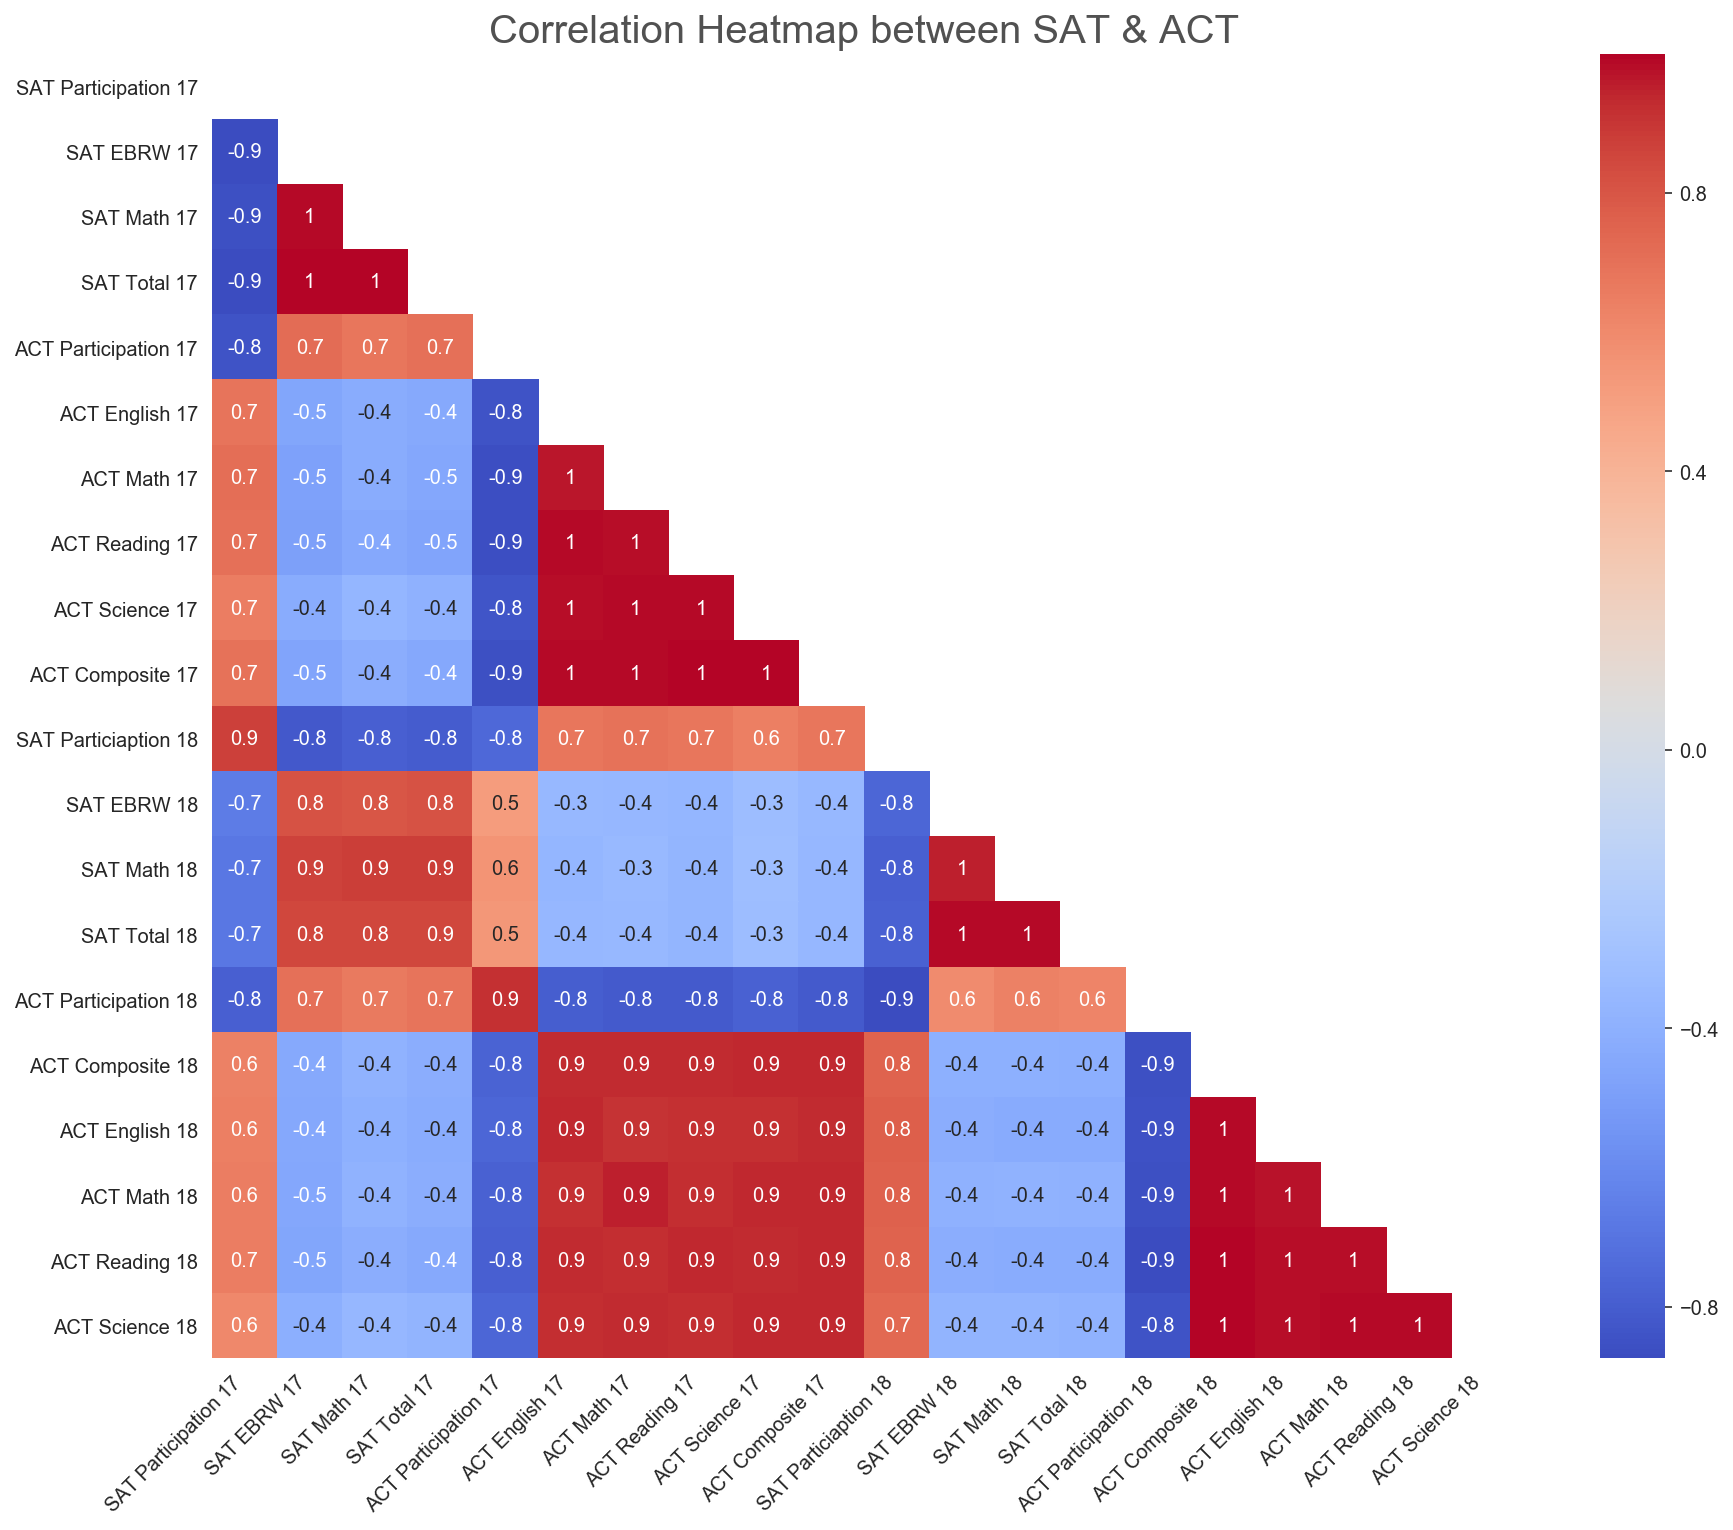

In [43]:
#Calculating correlation of final
final_corr = final.corr()

#Setting up the x and y label in a list
label = ['SAT Participation 17', 'SAT EBRW 17', 'SAT Math 17', 'SAT Total 17', 
         'ACT Participation 17', 'ACT English 17', 'ACT Math 17', 'ACT Reading 17', 
         'ACT Science 17', 'ACT Composite 17', 'SAT Particiaption 18', 'SAT EBRW 18', 
         'SAT Math 18', 'SAT Total 18', 'ACT Participation 18', 'ACT Composite 18','ACT English 18', 
         'ACT Math 18', 'ACT Reading 18', 'ACT Science 18']

#Setting up plot size
plt.figure(figsize=(15,12))

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(final_corr)
mask[np.triu_indices_from(mask)] = True

#plot design & title
ax = sns.heatmap(final_corr,mask=mask, cmap='coolwarm',annot=True,xticklabels = label, 
                 yticklabels=label, square = True, fmt='.1g')
ax.set_title('Correlation Heatmap between SAT & ACT',fontsize = 20,fontweight = 4, y = 2,alpha=0.8)
#Rotate X label for readability
plt.xticks(rotation = 45)

#Offsetting X label to the right
for tick in ax.xaxis.get_majorticklabels():
    tick.set_horizontalalignment("right")

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [44]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize = (10,10) ) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], label = list_of_xlabels, bins = 10, align='right') # feel free to add more settings
        ax[i].set_title(list_of_titles[i],fontsize = 20,fontweight = 4, y = 1.01,alpha=0.8) # Set titles, labels, etc here for each subplot
        

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

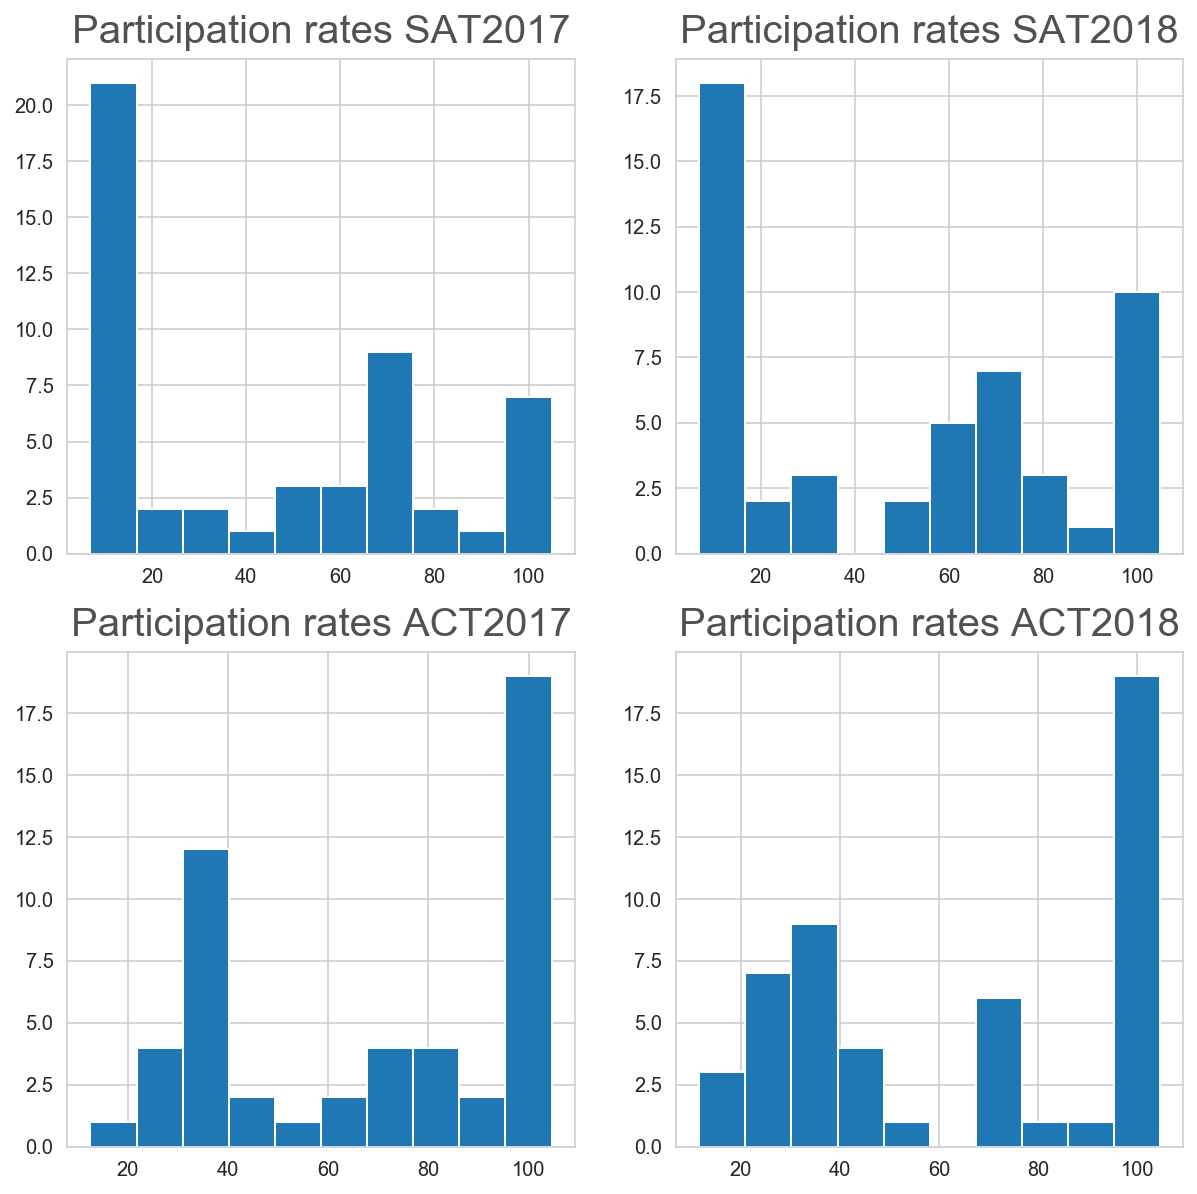

In [45]:
# Plotting Participation rates for SAT & ACT

#Setting up titles
list_of_titles1 = ['Participation rates SAT2017', 'Participation rates SAT2018','Participation rates ACT2017', 'Participation rates ACT2018']
#Setting up labels
list_of_xlabels1 = ['SAT2017', 'SAT2018','ACT2017', 'ACT2018']
#Setting up columns
list_of_columns1 = [final.columns[1], final.columns[11],final.columns[5], final.columns[15]]
#Run function to plot graph
subplot_histograms(final,list_of_columns1, list_of_titles1, list_of_xlabels1 )

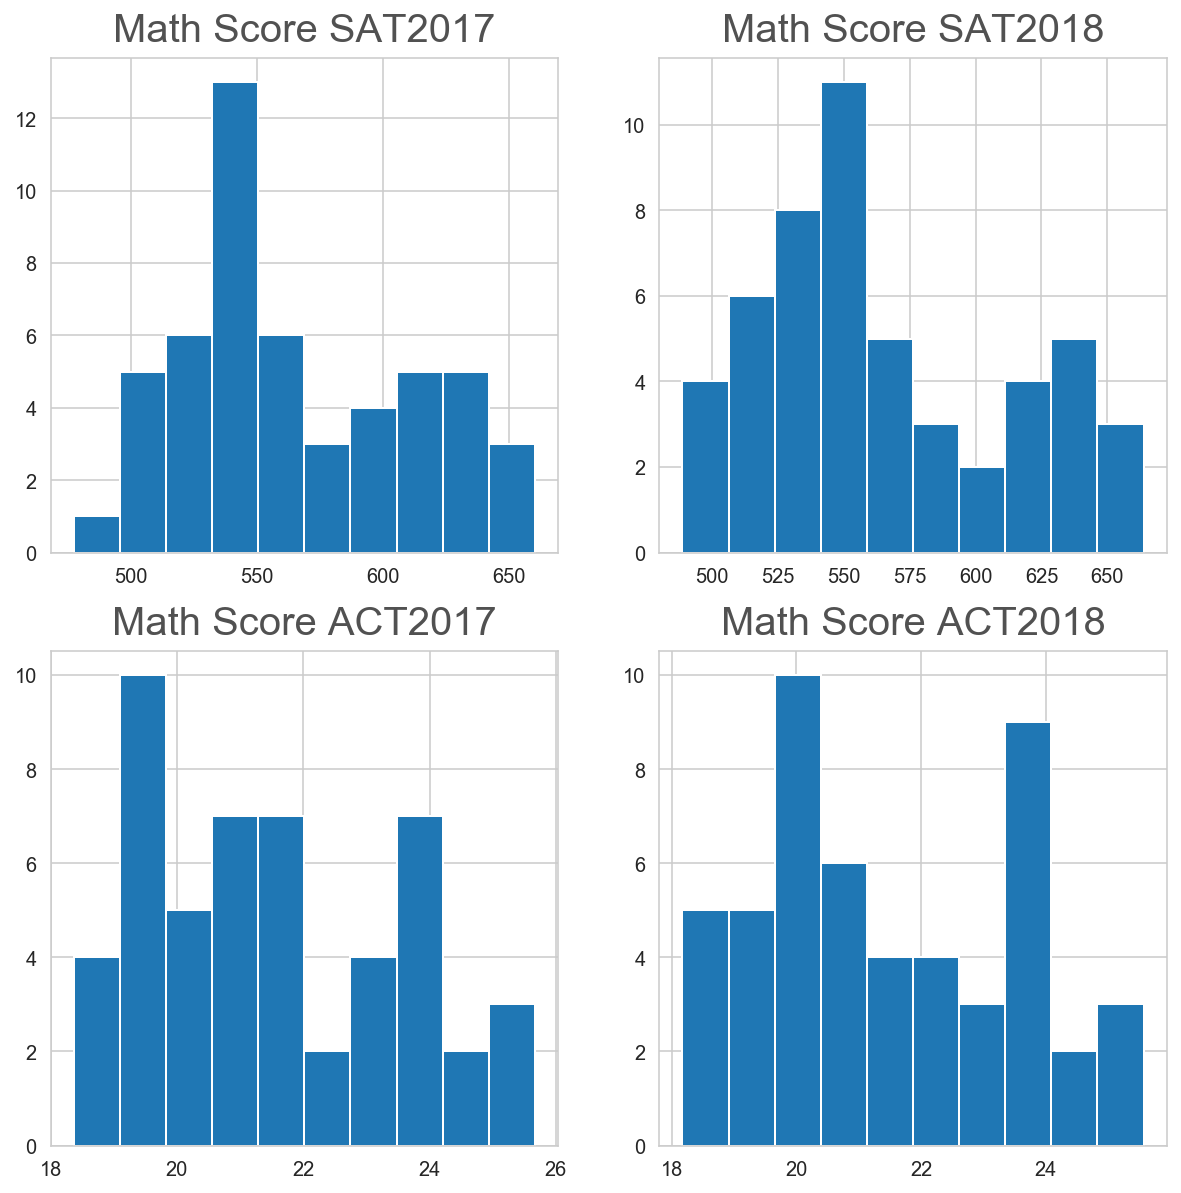

In [46]:
# Plotting Math scores for SAT & ACT
#Setting up titles
list_of_titles1 = ['Math Score SAT2017',  'Math Score SAT2018', 'Math Score ACT2017','Math Score ACT2018']
#Setting up labels
list_of_xlabels1 = ['SAT2017', 'SAT2018','ACT2017', 'ACT2018']
#Setting up columns
list_of_columns1 = [final.columns[3],  final.columns[13],final.columns[7], final.columns[18]]
#Run function to plot graph
subplot_histograms(final,list_of_columns1, list_of_titles1, list_of_xlabels1 )

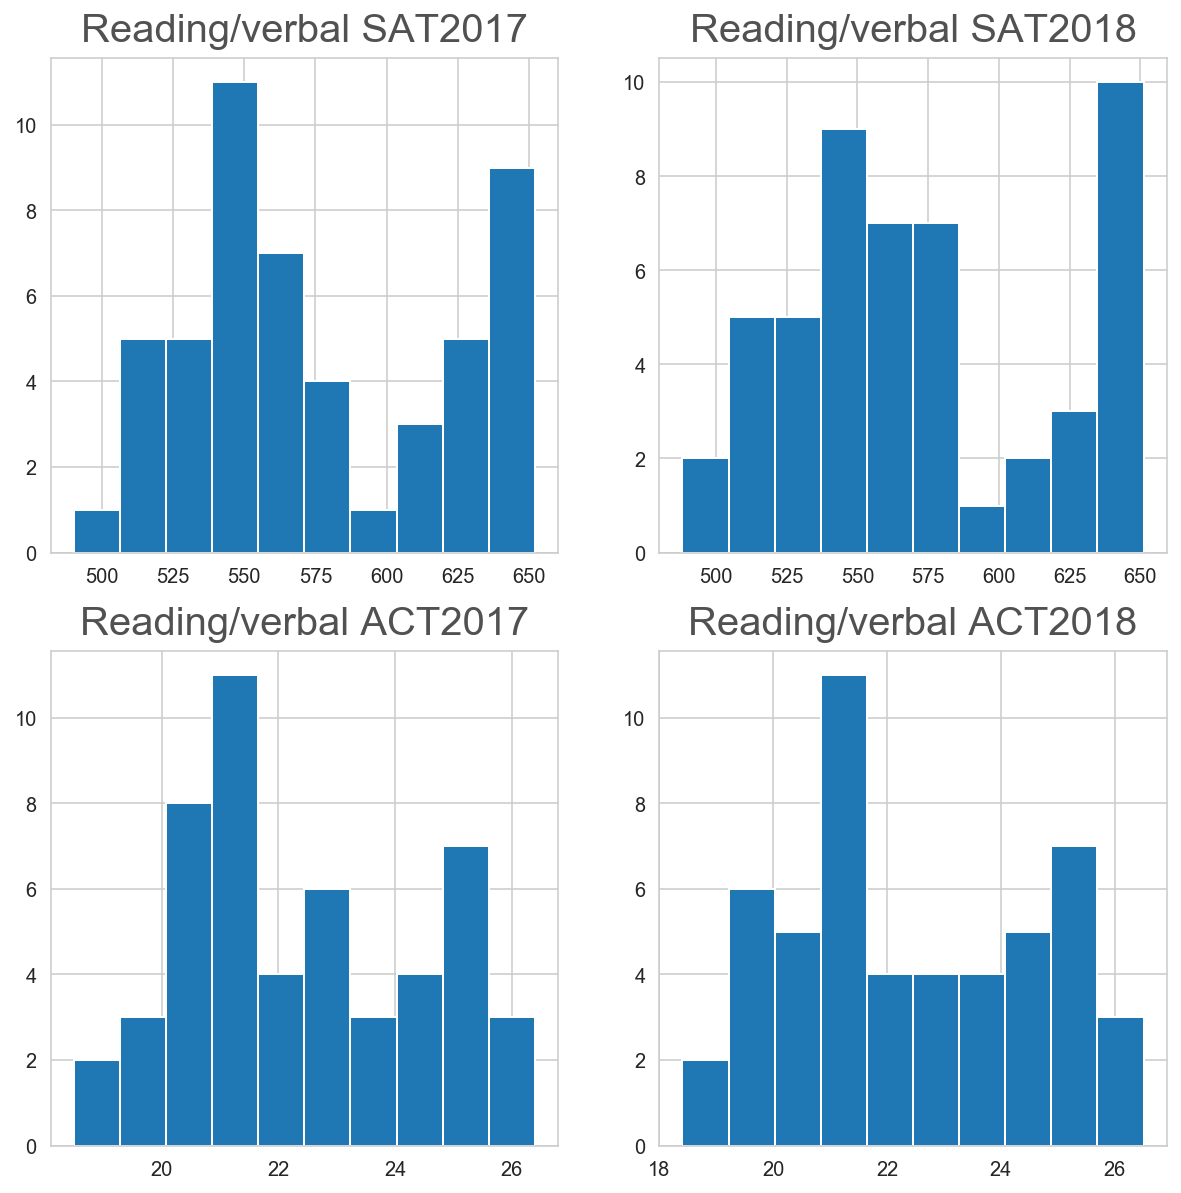

In [47]:
# Plotting Reading/verbal scores for SAT & ACT
#Setting up titles
list_of_titles1 = ['Reading/verbal SAT2017',  'Reading/verbal SAT2018', 'Reading/verbal ACT2017','Reading/verbal ACT2018']
#Setting up labels
list_of_xlabels1 = ['SAT2017',  'SAT2018', 'ACT2017','ACT2018']
#Setting up columns
list_of_columns1 = [final.columns[2],  final.columns[12],final.columns[8], final.columns[19]]
#Run function to plot graph
subplot_histograms(final,list_of_columns1, list_of_titles1, list_of_xlabels1 )

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [48]:
# Function to plot scatter plot
def scatter(dataframe, list_of_columns, titles,label):
    fig, ax = plt.subplots(figsize = (8,8) )
    ax.scatter(dataframe[list_of_columns[0]], dataframe[list_of_columns[1]])
    ax.set_title(titles,fontsize = 20,fontweight = 4, y = 1.01,alpha=0.8)
    ax.set_xlabel(label[0], fontsize = 15)
    ax.set_ylabel(label[1],  fontsize = 15)
        

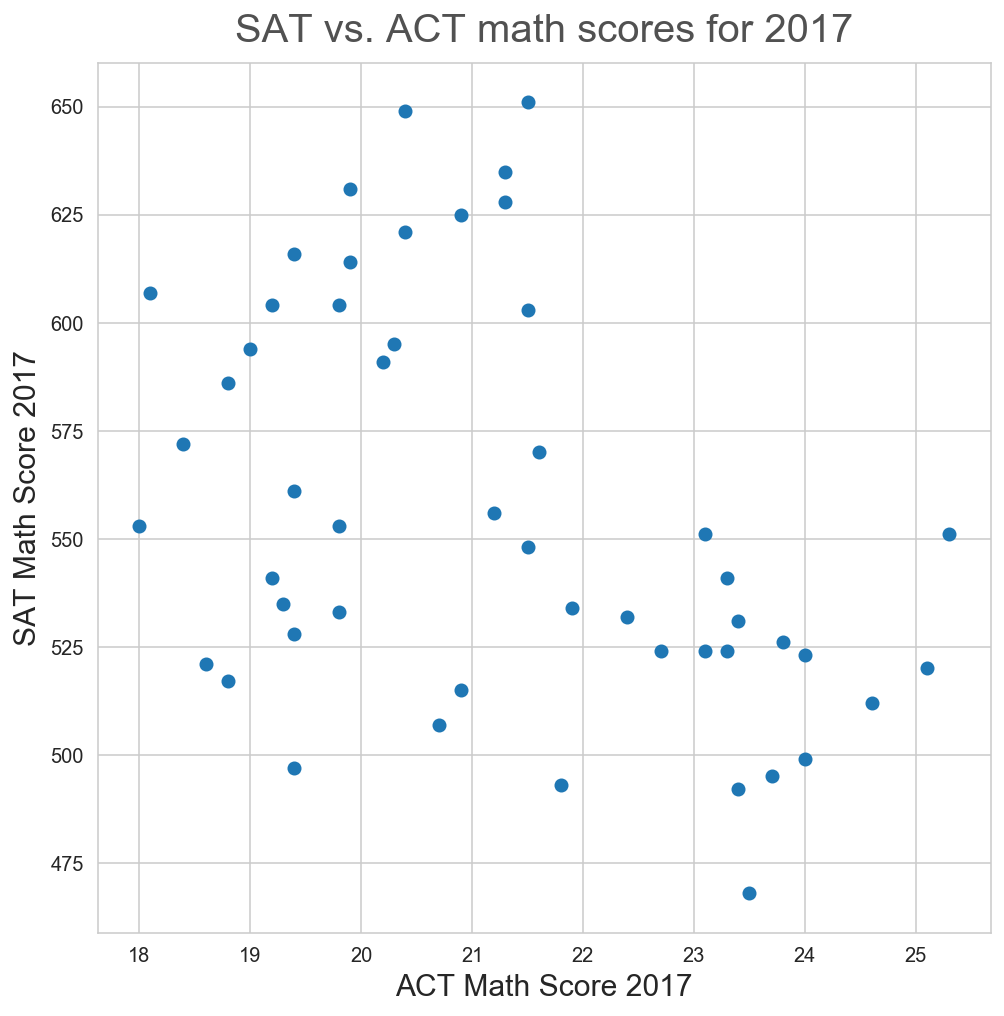

In [49]:
#Plotting SAT vs. ACT math scores for 2017'
#setting title
titles = 'SAT vs. ACT math scores for 2017'
#setting label
label = ['ACT Math Score 2017', 'SAT Math Score 2017']
#plotting scatter graph
scatter(final, ['17_act_math','17_sat_math'], titles, label)

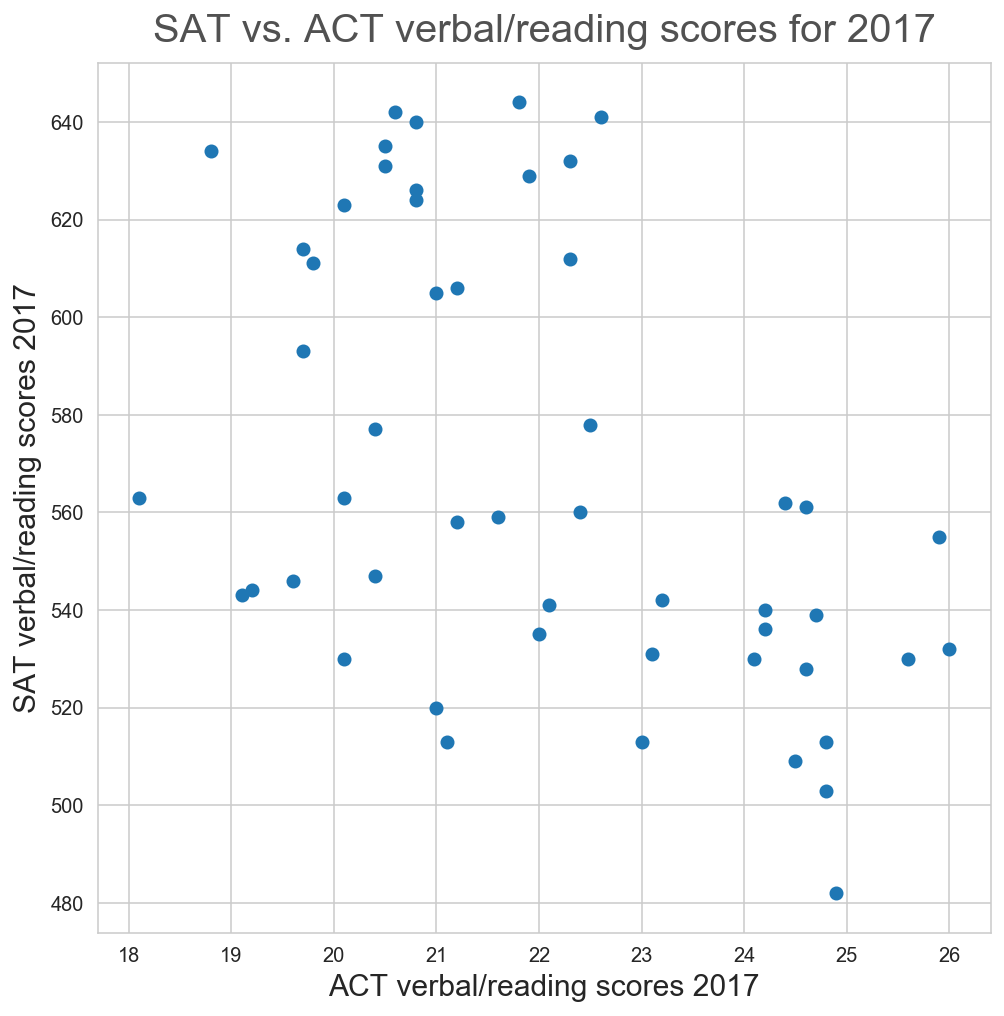

In [50]:
#SAT vs. ACT verbal/reading scores for 2017
#setting title
titles = 'SAT vs. ACT verbal/reading scores for 2017'
#setting label
label = ['ACT verbal/reading scores 2017', 'SAT verbal/reading scores 2017']
#plotting scatter graph
scatter(final, ['17_act_reading','17_sat_ebrw'], titles, label)

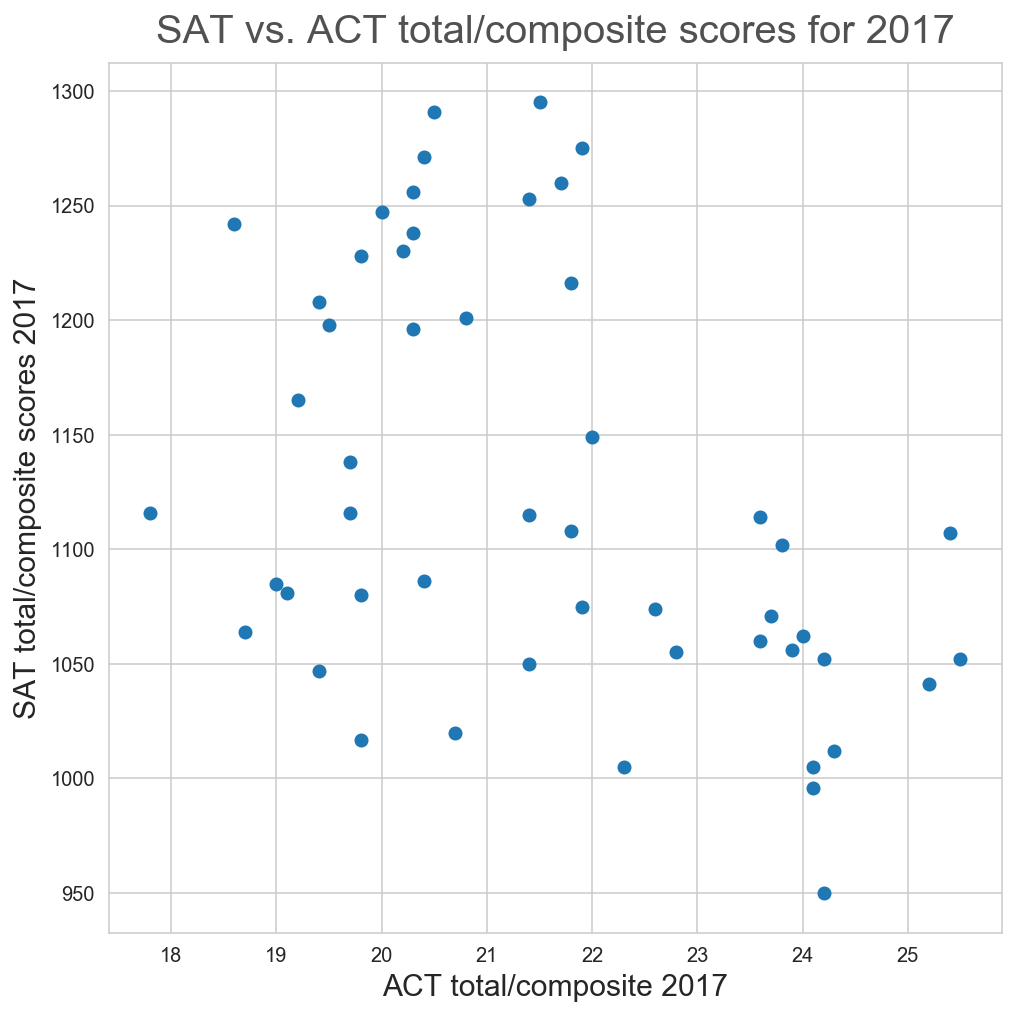

In [51]:
#SAT vs. ACT total/composite scores for 2017
#setting title
titles = 'SAT vs. ACT total/composite scores for 2017'
#setting label
label = ['ACT total/composite 2017', 'SAT total/composite scores 2017']
#plotting scatter graph
scatter(final, ['17_act_composite','17_sat_total'], titles, label)

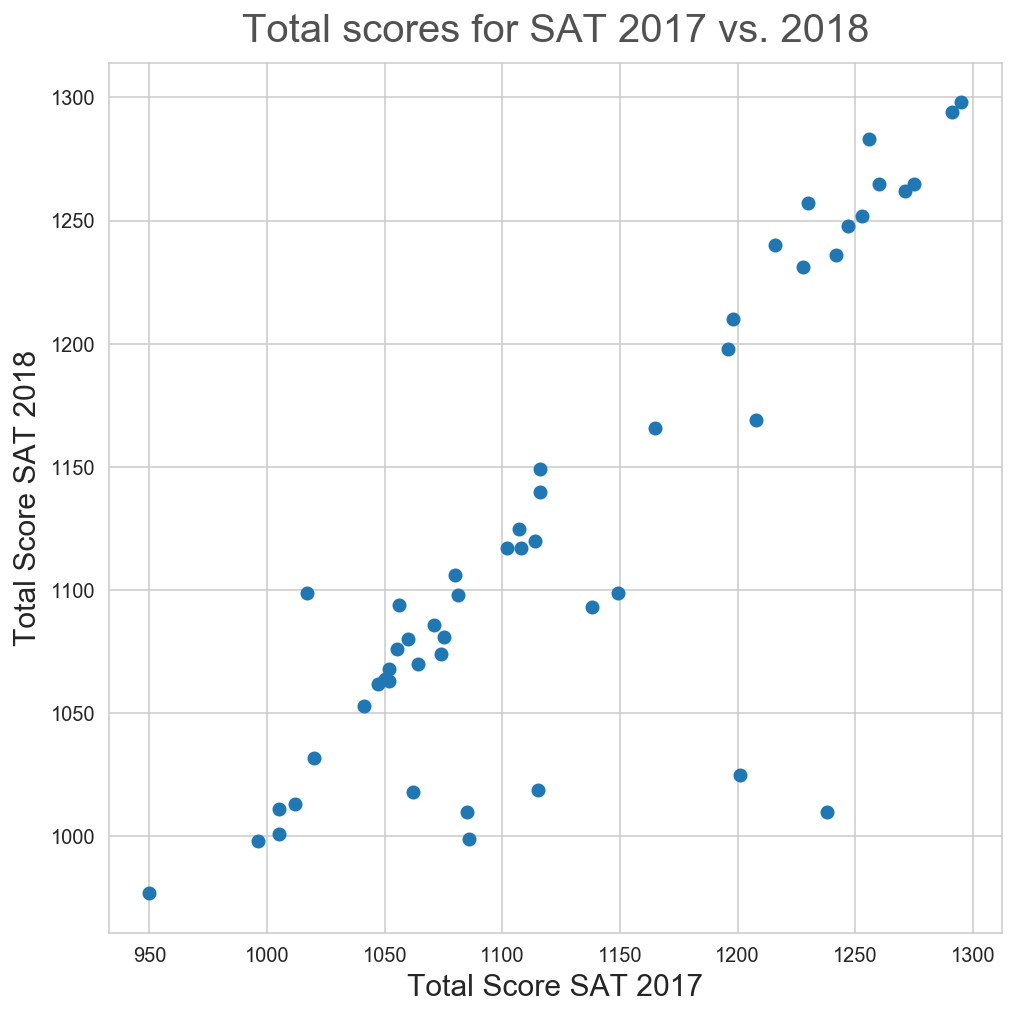

In [52]:
#Total scores for SAT 2017 vs. 2018
#setting title
titles = 'Total scores for SAT 2017 vs. 2018'
#setting label
label = ['Total Score SAT 2017', 'Total Score SAT 2018']
#plotting scatter graph
scatter(final, ['17_sat_total','18_sat_total'], titles, label)

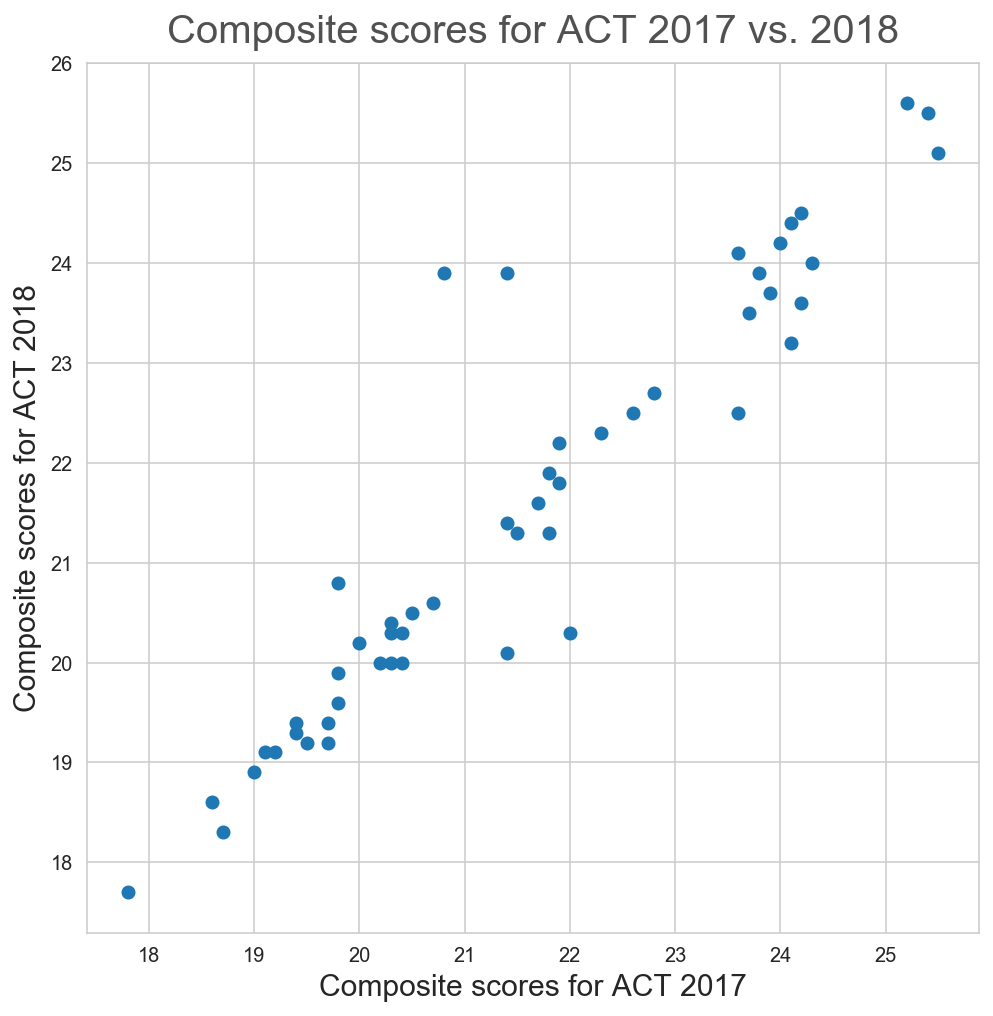

In [53]:
#Composite scores for ACT 2017 vs. 2018
#setting title
titles = 'Composite scores for ACT 2017 vs. 2018'
#setting label
label = ['Composite scores for ACT 2017', 'Composite scores for ACT 2018']
#plotting scatter graph
scatter(final, ['17_act_composite','18_act_composite'], titles, label)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0, 0.5, 'Percentage %')

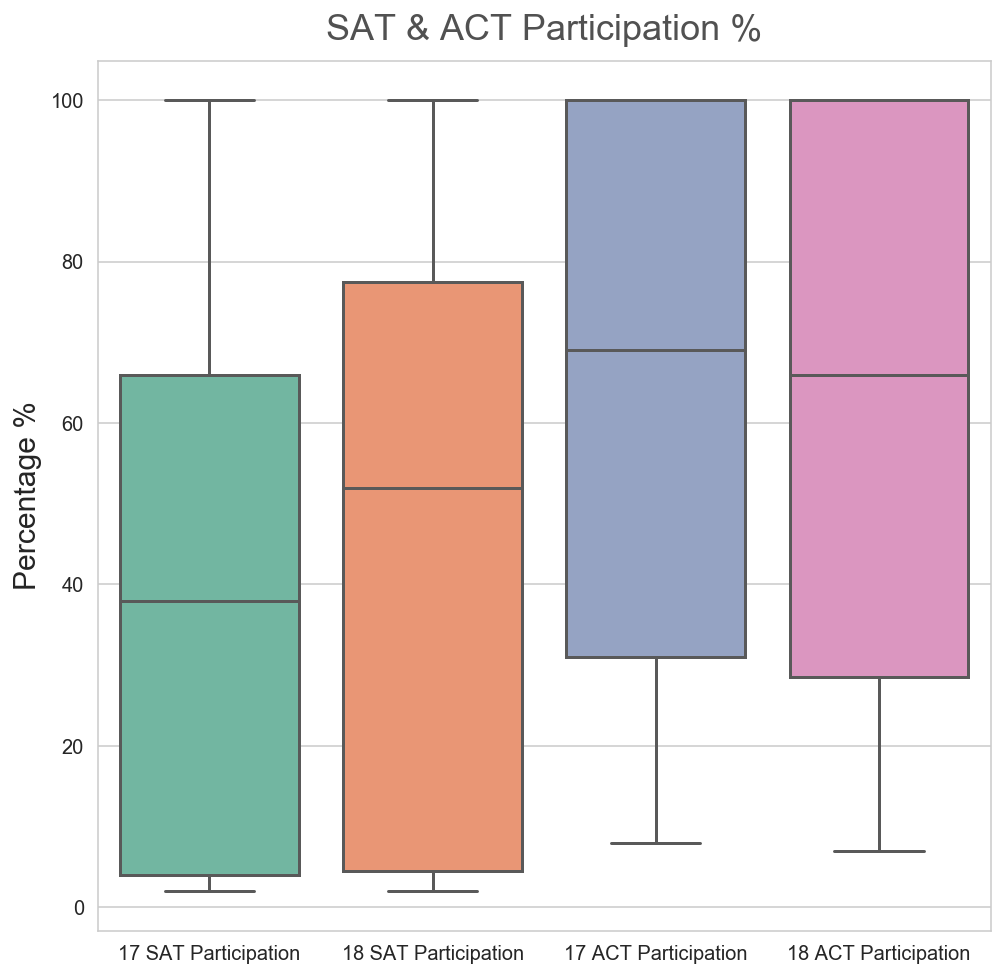

In [85]:
# Plotting Box plot for participation rate
#setting up the axis
xaxis = ['17 SAT Participation', '18 SAT Participation', '17 ACT Participation', '18 ACT Participation']
yaxis = [final['17_sat_part'],final['18_sat_part'],final['17_act_part'],final['18_act_part']]

#plot
plt.figure(figsize=(8,8))
ax = sns.boxplot(xaxis,yaxis,palette = 'Set2')
ax.set_title('SAT & ACT Participation %',fontsize = 18,fontweight = 4, y = 1.01,alpha=0.8)
ax.set_ylabel('Percentage %',fontsize=15)

Text(0, 0.5, 'Score (200-1600)')

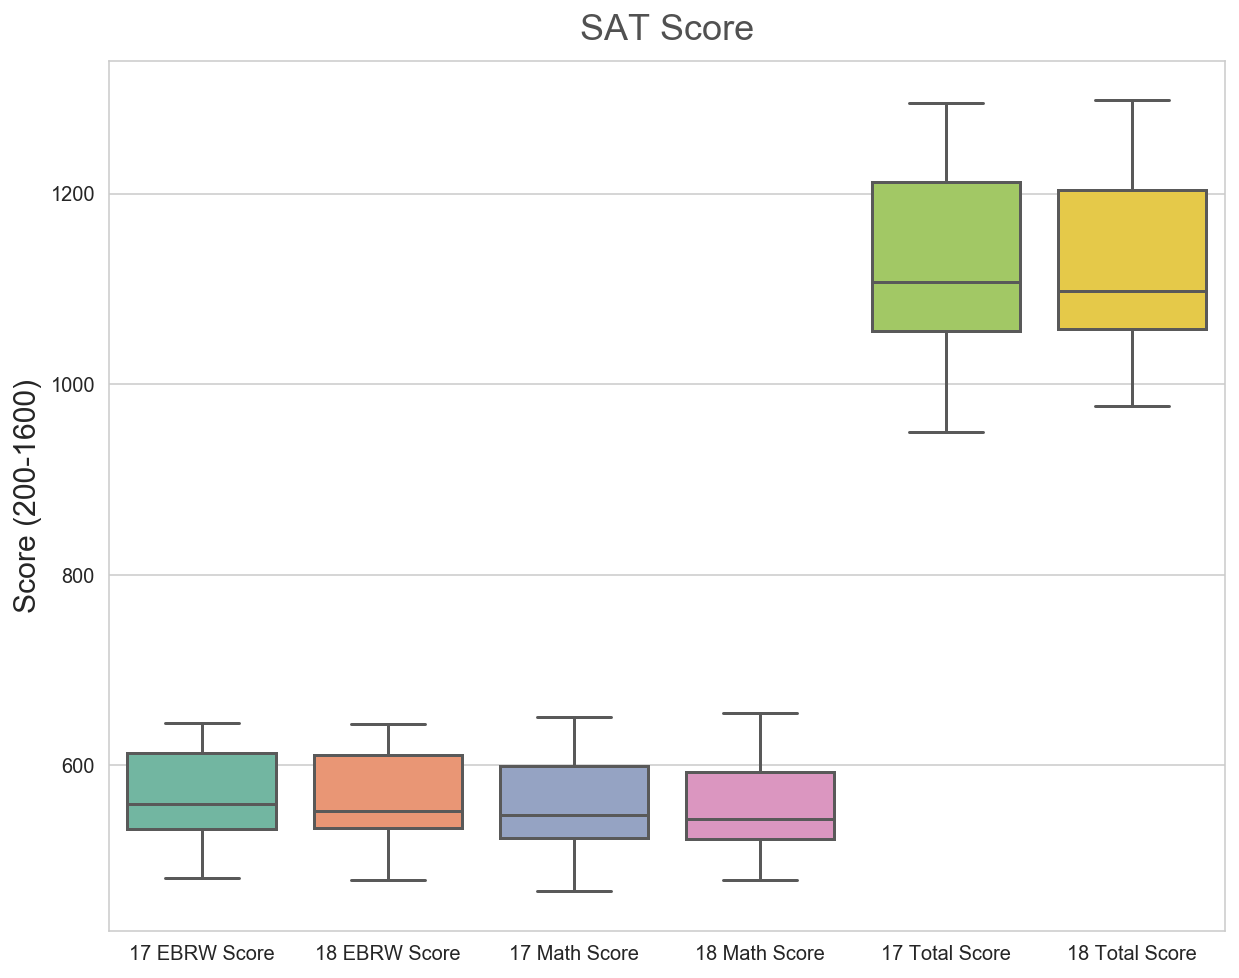

In [88]:
# Plotting Box plot for SAT score
#setting up the axis
xaxis = ['17 EBRW Score', '18 EBRW Score', '17 Math Score', '18 Math Score', '17 Total Score', '18 Total Score']
yaxis = [final['17_sat_ebrw'],final['18_sat_ebrw'],final['17_sat_math'],final['18_sat_math'], final['17_sat_total'], final['18_sat_total']]

#plot
plt.figure(figsize=(10,8))
ax = sns.boxplot(xaxis,yaxis,palette = 'Set2')
ax.set_title('SAT Score',fontsize = 18,fontweight = 4, y = 1.01,alpha=0.8)
ax.set_ylabel('Score (200-1600)',fontsize=15)

Text(0, 0.5, 'Score (1-36)')

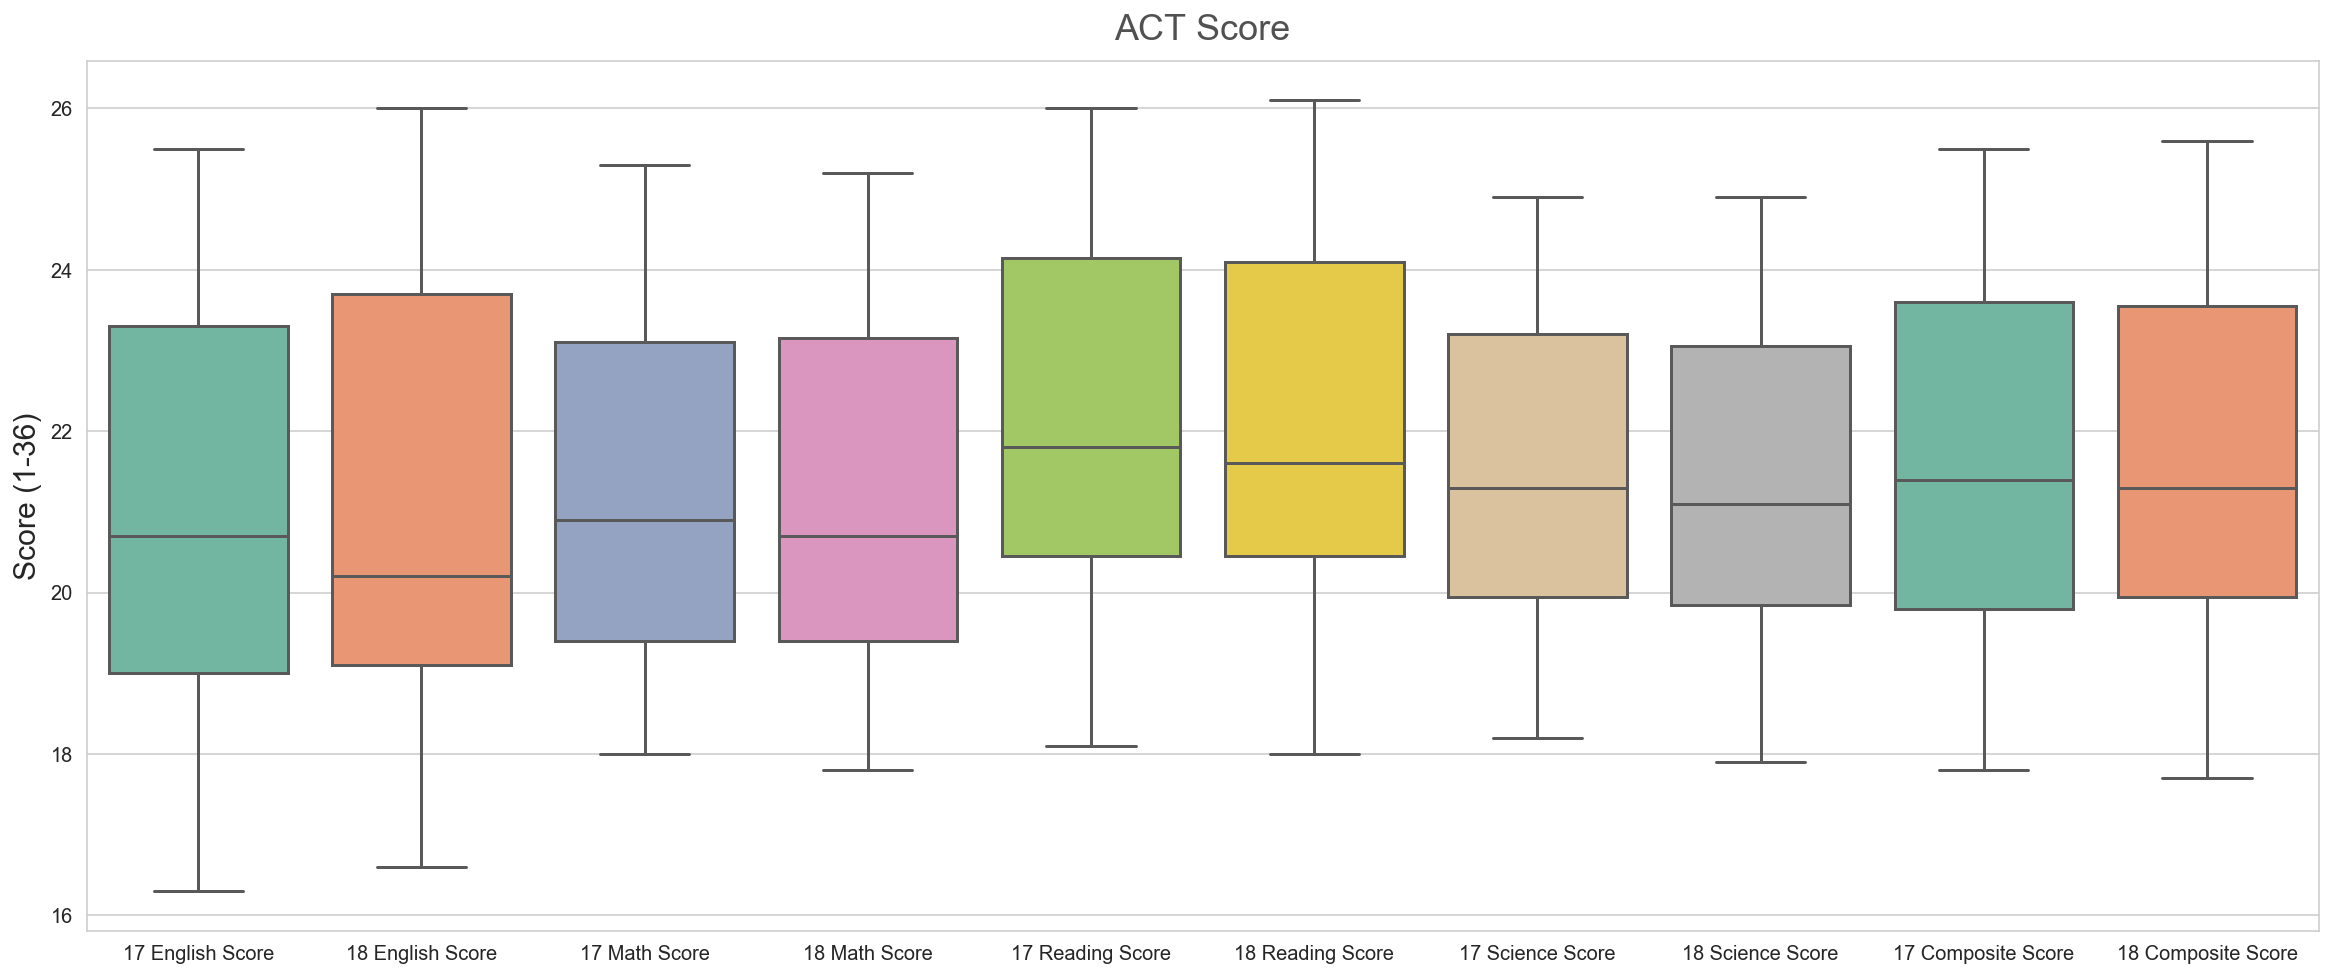

In [90]:
# Plotting Box plot for ACT score
#setting up the axis
xaxis = ['17 English Score', '18 English Score', '17 Math Score', '18 Math Score', '17 Reading Score', '18 Reading Score', '17 Science Score','18 Science Score','17 Composite Score','18 Composite Score']
yaxis = [final['17_act_english'],final['18_act_english'],final['17_act_math'],final['18_act_math'], final['17_act_reading'], final['18_act_reading'], final['17_act_science'],final['18_act_science'],final['17_act_composite'],final['18_act_composite']]

#plot
plt.figure(figsize=(20,8))
ax = sns.boxplot(xaxis,yaxis,palette = 'Set2')
ax.set_title('ACT Score',fontsize = 18,fontweight = 4, y = 1.01,alpha=0.8)
ax.set_ylabel('Score (1-36)',fontsize=15)

In [86]:
final.columns

Index(['state', '17_sat_part', '17_sat_ebrw', '17_sat_math', '17_sat_total',
       '17_act_part', '17_act_english', '17_act_math', '17_act_reading',
       '17_act_science', '17_act_composite', '18_sat_part', '18_sat_ebrw',
       '18_sat_math', '18_sat_total', '18_act_part', '18_act_composite',
       '18_act_english', '18_act_math', '18_act_reading', '18_act_science'],
      dtype='object')

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?